<a href="https://colab.research.google.com/github/shirinyamani/DS24/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [486]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 25)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [487]:
df = pd.read_csv('/content/Data_Science_Challenge.csv')

In [488]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [489]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [490]:
df.duplicated().sum()

0

In [491]:
df.filter(like='area')

,area code
0,415
1,415
2,415
3,408
4,415
...,...
3328,415
3329,415
3330,510
3331,510


In [492]:
df = df.drop(columns=['area code', 'phone number'])

In [493]:
df.dtypes

state                      object
account length              int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [494]:
cat = df.select_dtypes(include='object').columns.tolist()

In [495]:
cat

['state', 'international plan', 'voice mail plan']

In [496]:
#cat feature balance
df.select_dtypes(include='object').columns.tolist()
num_u = {}
for feature in cat:
  num_u[feature] = df[feature].nunique()

cat.remove('state')

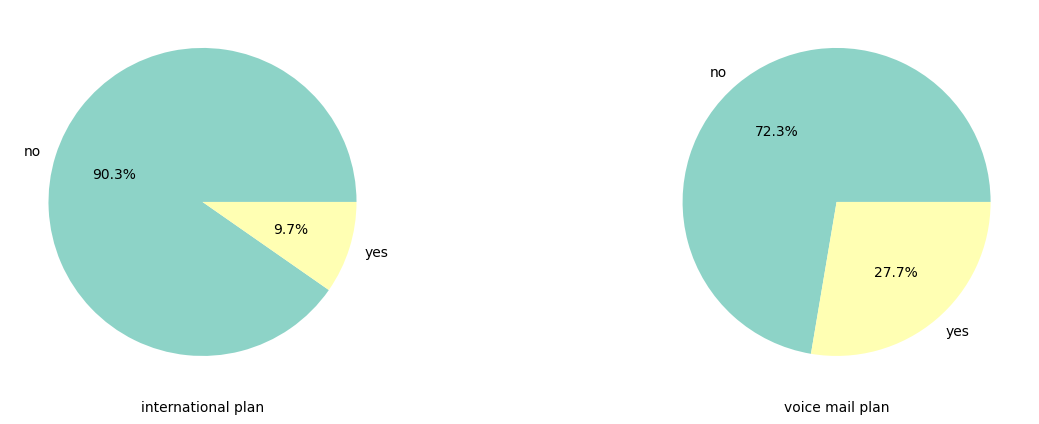

In [497]:
plot, axs = plt.subplots(1,2, figsize=(15,5))

for i, feature in enumerate(cat):
  axs[i].pie(x=df[feature].value_counts(), labels=df[feature].value_counts().index, autopct='%.1f%%', colors= sns.set_palette('Set3'))
  axs[i].set_xlabel(feature)

In [506]:
df.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [507]:
cat

['international plan', 'voice mail plan']

In [508]:
from sklearn.preprocessing import LabelEncoder

In [509]:
le = LabelEncoder()

In [510]:
for feature in cat:
  df[feature] = le.fit_transform(df[feature])


In [511]:
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [512]:
total_day_calls_duration= df.groupby('state')['total day minutes'].mean()

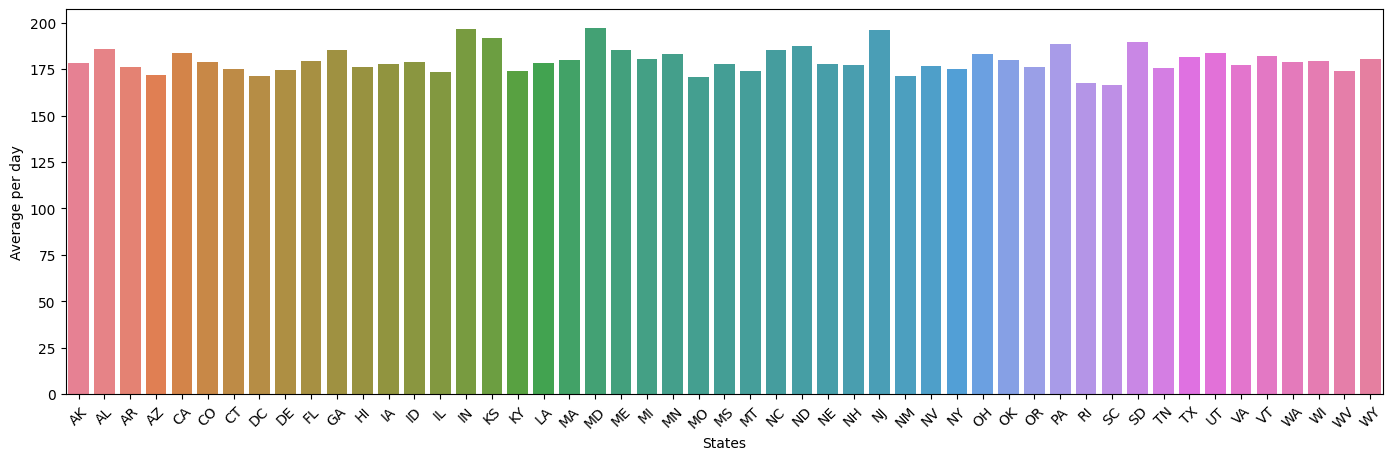

In [513]:
index_ = total_day_calls_duration.reset_index()

plt.figure(figsize=(17,5))
sns.barplot(data=index_ , x='state', y='total day minutes', hue='state')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Average per day')

plt.show()

## TOTAL CALL DURATION (MINUTE) PER DAY FOR EACH STATE

In [514]:
df['call_cycle_per_24hrs'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

In [515]:
total_call_cycle_per_state = df.groupby('state')['call_cycle_per_24hrs'].sum().reset_index()

In [516]:
total_call_cycle_per_state = total_call_cycle_per_state.rename(columns={'call_cycle_per_24hrs': 'total_call_cycle_per_state'})

In [517]:
df = pd.merge(df, total_call_cycle_per_state, how='left', on='state')

In [518]:
df['total_num_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

In [519]:
total_num_calls_each_state = df.groupby('state')['total_num_calls'].sum().reset_index()

In [520]:
total_num_calls_each_state = total_num_calls_each_state.rename(columns={'total_num_calls': 'total_num_calls_each_state'})

In [521]:
df = pd.merge(df, total_num_calls_each_state, how='right' , on='state')

In [522]:
df.drop(columns=['total_num_calls'], inplace=True)

In [523]:
df['total_call_cycle_per_state'] = df['total_call_cycle_per_state'] / 60

In [524]:
df['total_call_cycle_per_state'] = df['total_call_cycle_per_state'].round(3)

In [525]:
df['total_call_log_per_city(hour)'] = df['total_call_cycle_per_state'] * df['total_num_calls_each_state']

In [526]:
df.rename(columns={'total_call_log_per_city(hour)' : '24hrs_call_history_state'}, inplace=True)

In [527]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_cycle_per_24hrs,total_call_cycle_per_state,total_num_calls_each_state,24hrs_call_history_state
0,AK,36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False,438.1,480.995,15038,7.233203e+06
1,AK,136,1,1,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,False,493.2,480.995,15038,7.233203e+06
2,AK,104,0,0,0,278.4,106,47.33,81.0,113,6.89,163.2,137,7.34,9.8,5,2.65,1,False,522.6,480.995,15038,7.233203e+06
3,AK,127,0,1,36,183.2,117,31.14,126.8,76,10.78,263.3,71,11.85,11.2,8,3.02,1,False,573.3,480.995,15038,7.233203e+06
4,AK,126,0,0,0,58.2,94,9.89,138.7,118,11.79,136.8,91,6.16,11.9,1,3.21,5,True,333.7,480.995,15038,7.233203e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WY,58,0,0,0,210.1,126,35.72,248.9,108,21.16,158.6,88,7.14,14.4,2,3.89,4,False,617.6,750.963,23368,1.754850e+07
3329,WY,123,0,0,0,242.2,87,41.17,226.1,101,19.22,268.6,121,12.09,8.2,3,2.21,5,True,736.9,750.963,23368,1.754850e+07
3330,WY,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,156,10.07,12.3,5,3.32,3,False,692.4,750.963,23368,1.754850e+07
3331,WY,148,0,0,0,243.0,115,41.31,191.8,91,16.30,117.8,93,5.30,13.4,5,3.62,2,False,552.6,750.963,23368,1.754850e+07


## FOR CHARGE

In [528]:
df['total_daily_call_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] #total cost of 24hrs cycle per each call in each state

In [529]:
charge_per_state = df.groupby('state')['total_daily_call_charge'].sum().reset_index()

In [530]:
charge_per_state = charge_per_state.rename(columns={'total_daily_call_charge': 'total_daily_call_cost_per_state'})

In [531]:
df = pd.merge(df, charge_per_state, how='right', on='state' )

In [532]:
df.rename(columns={'total_daily_call_cost_per_state': 'total_daily_cost_state_per_call'}, inplace=True)

In [533]:
df['total_call_cost_state'] = df['total_daily_cost_state_per_call'] * df['total_num_calls_each_state']

In [534]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_cycle_per_24hrs,total_call_cycle_per_state,total_num_calls_each_state,24hrs_call_history_state,total_daily_call_charge,total_daily_cost_state_per_call,total_call_cost_state
0,AK,36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,...,14.5,6,3.92,0,False,438.1,480.995,15038,7.233203e+06,44.50,2841.53,4.273093e+07
1,AK,136,1,1,33,203.9,106,34.66,187.6,99,15.95,101.7,...,10.5,6,2.84,3,False,493.2,480.995,15038,7.233203e+06,55.19,2841.53,4.273093e+07
2,AK,104,0,0,0,278.4,106,47.33,81.0,113,6.89,163.2,...,9.8,5,2.65,1,False,522.6,480.995,15038,7.233203e+06,61.56,2841.53,4.273093e+07
3,AK,127,0,1,36,183.2,117,31.14,126.8,76,10.78,263.3,...,11.2,8,3.02,1,False,573.3,480.995,15038,7.233203e+06,53.77,2841.53,4.273093e+07
4,AK,126,0,0,0,58.2,94,9.89,138.7,118,11.79,136.8,...,11.9,1,3.21,5,True,333.7,480.995,15038,7.233203e+06,27.84,2841.53,4.273093e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WY,58,0,0,0,210.1,126,35.72,248.9,108,21.16,158.6,...,14.4,2,3.89,4,False,617.6,750.963,23368,1.754850e+07,64.02,4395.69,1.027185e+08
3329,WY,123,0,0,0,242.2,87,41.17,226.1,101,19.22,268.6,...,8.2,3,2.21,5,True,736.9,750.963,23368,1.754850e+07,72.48,4395.69,1.027185e+08
3330,WY,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,...,12.3,5,3.32,3,False,692.4,750.963,23368,1.754850e+07,68.93,4395.69,1.027185e+08
3331,WY,148,0,0,0,243.0,115,41.31,191.8,91,16.30,117.8,...,13.4,5,3.62,2,False,552.6,750.963,23368,1.754850e+07,62.91,4395.69,1.027185e+08


In [535]:
new_df = df.copy()

In [536]:
new_df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_cycle_per_24hrs,total_call_cycle_per_state,total_num_calls_each_state,24hrs_call_history_state,total_daily_call_charge,total_daily_cost_state_per_call,total_call_cost_state
0,AK,36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,...,14.5,6,3.92,0,False,438.1,480.995,15038,7.233203e+06,44.50,2841.53,4.273093e+07
1,AK,136,1,1,33,203.9,106,34.66,187.6,99,15.95,101.7,...,10.5,6,2.84,3,False,493.2,480.995,15038,7.233203e+06,55.19,2841.53,4.273093e+07
2,AK,104,0,0,0,278.4,106,47.33,81.0,113,6.89,163.2,...,9.8,5,2.65,1,False,522.6,480.995,15038,7.233203e+06,61.56,2841.53,4.273093e+07
3,AK,127,0,1,36,183.2,117,31.14,126.8,76,10.78,263.3,...,11.2,8,3.02,1,False,573.3,480.995,15038,7.233203e+06,53.77,2841.53,4.273093e+07
4,AK,126,0,0,0,58.2,94,9.89,138.7,118,11.79,136.8,...,11.9,1,3.21,5,True,333.7,480.995,15038,7.233203e+06,27.84,2841.53,4.273093e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WY,58,0,0,0,210.1,126,35.72,248.9,108,21.16,158.6,...,14.4,2,3.89,4,False,617.6,750.963,23368,1.754850e+07,64.02,4395.69,1.027185e+08
3329,WY,123,0,0,0,242.2,87,41.17,226.1,101,19.22,268.6,...,8.2,3,2.21,5,True,736.9,750.963,23368,1.754850e+07,72.48,4395.69,1.027185e+08
3330,WY,41,0,0,0,223.8,67,38.05,244.8,74,20.81,223.8,...,12.3,5,3.32,3,False,692.4,750.963,23368,1.754850e+07,68.93,4395.69,1.027185e+08
3331,WY,148,0,0,0,243.0,115,41.31,191.8,91,16.30,117.8,...,13.4,5,3.62,2,False,552.6,750.963,23368,1.754850e+07,62.91,4395.69,1.027185e+08


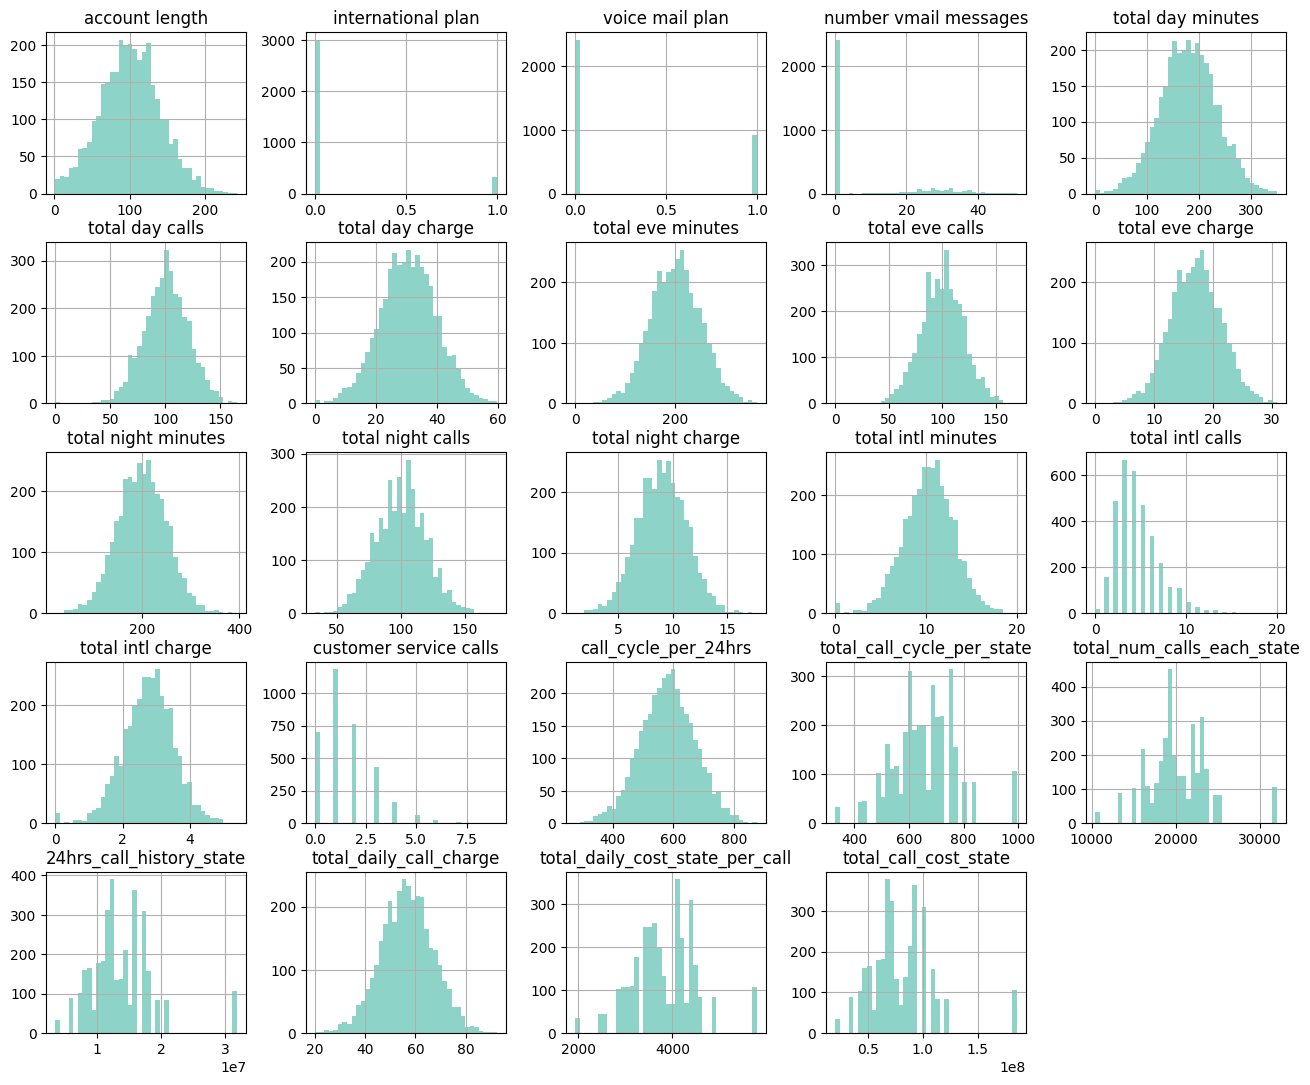

In [537]:
# check distribution of values
new_df.hist(figsize=(16,13),bins = 40)
plt.show()

In [538]:
corr = new_df.corr()

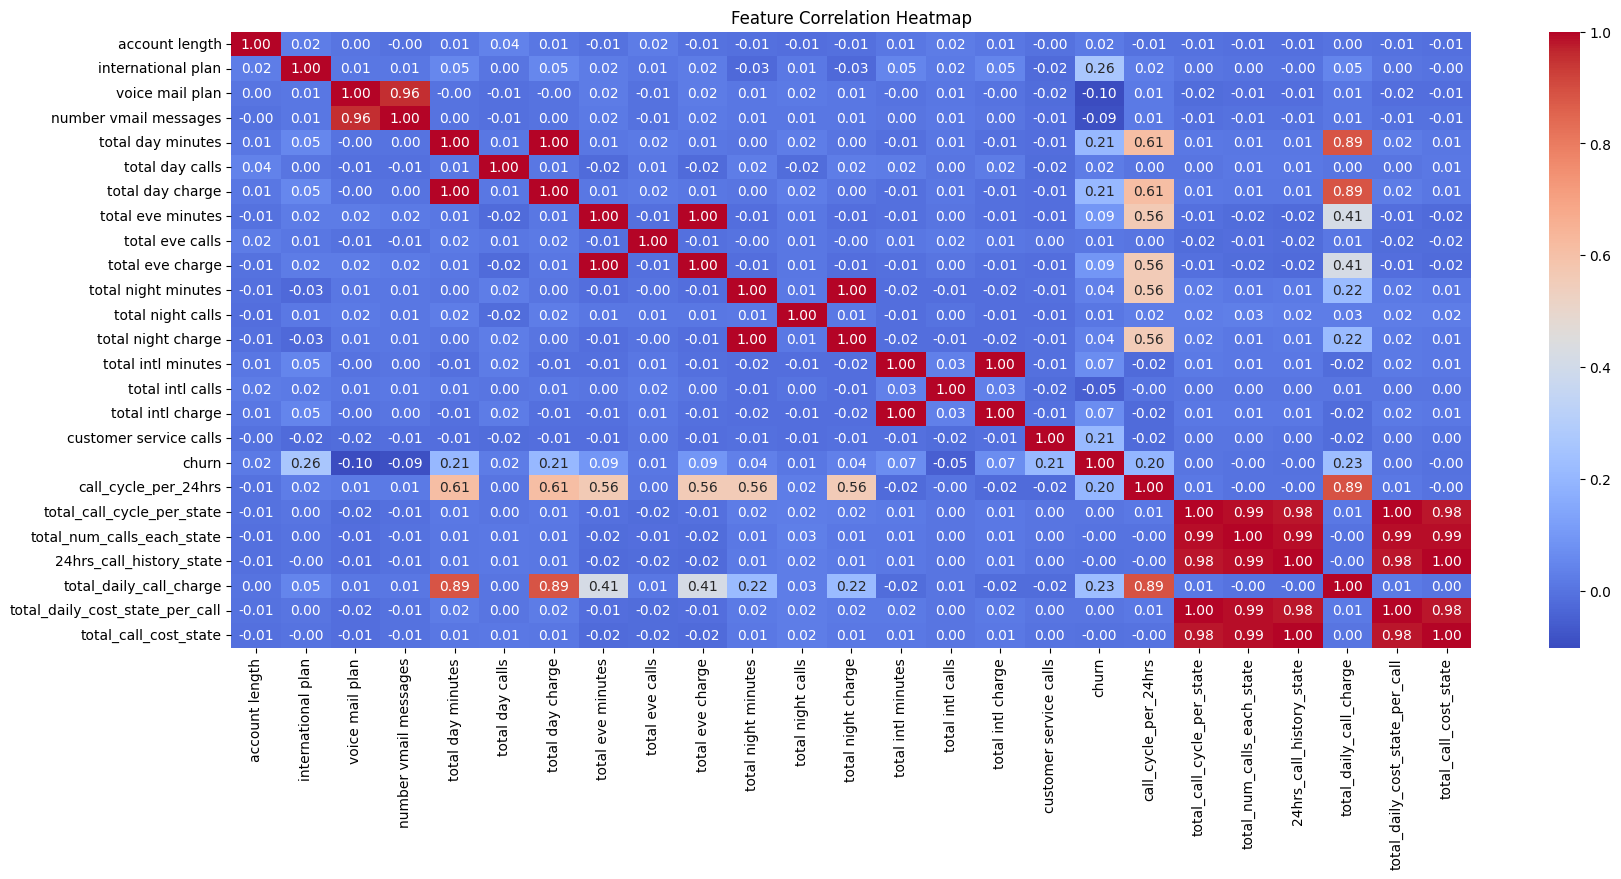

In [546]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [467]:
#count the target
new_df.groupby(df['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

In [468]:
new_df = pd.get_dummies(data=new_df, columns=['state'], drop_first=False, dtype='int')

In [469]:
from xgboost import XGBClassifier
## models : xgboost, naive.gaussian

In [470]:
from sklearn.model_selection import train_test_split as tts

In [471]:
X_train, X_test, y_train, y_test = tts(new_df.drop(columns=['churn']), new_df['churn'], test_size=0.2, random_state=42)

In [472]:
params_ = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'reg_lambda': 0.010 ,
    'reg_alpha': 2.188e-08
}

In [473]:
model = XGBClassifier(**params_)

In [474]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [475]:
y_pred = model.predict(X_test)

In [476]:
from sklearn.metrics import accuracy_score

In [477]:
acc = accuracy_score(y_test, y_pred)

In [478]:
acc

0.9700149925037481

In [479]:
from xgboost import plot_importance

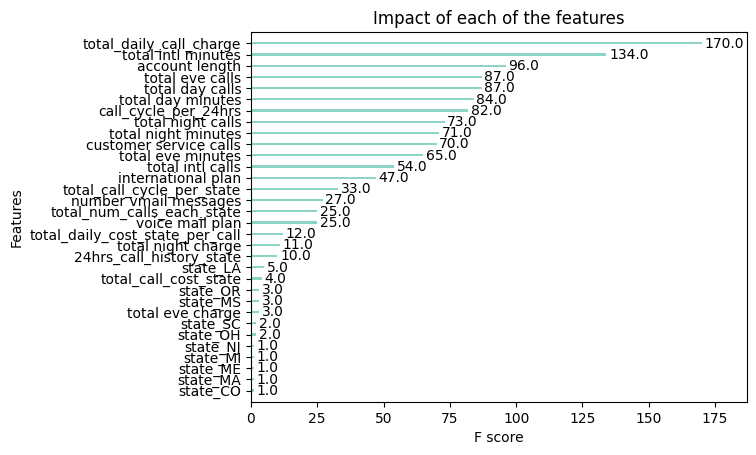

In [480]:
plot_importance(model, importance_type='weight', grid=False, title='Impact of each of the features')
plt.show()

In [484]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [482]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       577
        True       1.00      0.78      0.88        90

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



In [483]:
print(confusion_matrix(y_test, y_pred))

[[577   0]
 [ 20  70]]


In [485]:
print(f1_score(y_test, y_pred))

0.8750000000000001
